In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import glob
import subprocess
import os
import fileinput
import math
import cv2

In [2]:
path = 'C:/NHF/images/2018/'
i = 0
labels = []
img_list = []
# Find all .midi files in the given directory and convert them first into CSV files, after that the CSVs into .png files
for filename in glob.glob(path + '*.png'):
    #print(filename)
    img = cv2.imread(filename,  cv2.IMREAD_UNCHANGED)
    #print(img)
    #Append current picture to the list of  all pictures
    img_list.append(img)

In [3]:
x_train = np.array(img_list)
x_train = x_train / 255.0
x_train = x_train.astype("float32")

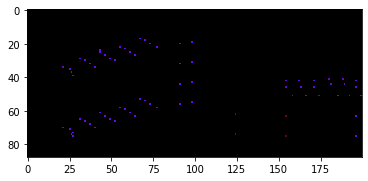

In [5]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])

In [6]:
from __future__ import print_function, division

from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv2D, Conv2DTranspose, UpSampling2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
import keras
import matplotlib.pyplot as plt

import sys

import numpy as np

Using TensorFlow backend.


In [11]:
# Preview image 
PREVIEW_ROWS = 4
PREVIEW_COLS = 7
PREVIEW_MARGIN = 16
SAVE_FREQ = 10

EPOCHS = 30000
BATCH_SIZE = 128
DATA_PATH = 'c:/NHF/classicalSqAndDense'

In [12]:
'''
def build_generator(seed_size, channels):

    model = Sequential()

    model.add(Dense(128 * 5 * 19, input_dim=seed_size))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((5, 19, 128)))
    
    model.add(Conv2DTranspose(128, kernel_size=(4,4), strides=(1,1)))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    
    #model.add(Conv2DTranspose(128, kernel_size=(23,51), strides=(1,1), padding = 'same'))
    #model.add(BatchNormalization(momentum=0.8))
    #model.add(LeakyReLU(alpha=0.2))
    
    model.add(Conv2DTranspose(64, kernel_size=(5,5), strides=(2,2)))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    
    model.add(Conv2DTranspose(64, kernel_size=(6,6), strides=(2,2)))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2DTranspose(channels, kernel_size=(6,6), strides=(2,2)))
    model.add(Activation("tanh"))

    model.summary()

    noise = Input(shape=(seed_size,))
    img = model(noise)

    return Model(noise, img)
'''
def build_generator(seed_size, channels):

    model = Sequential()

    model.add(Dense(128 * 11 * 25, input_dim=seed_size))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((11, 25, 128)))
    model.add(Conv2DTranspose(128, kernel_size=(2,2), strides=(2,2), padding = 'same'))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    #model.add(Conv2DTranspose(128, kernel_size=(23,51), strides=(1,1), padding = 'same'))
    #model.add(BatchNormalization(momentum=0.8))
    #model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2DTranspose(64, kernel_size=(2,2), strides=(2,2), padding = 'same'))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2DTranspose(channels, kernel_size=(2,2), strides=(2,2), padding = 'same'))
    model.add(Activation("tanh"))

    model.summary()

    noise = Input(shape=(seed_size,))
    img = model(noise)

    return Model(noise, img)
'''
def build_generator(seed_size, channels):

    model = Sequential()

    model.add(Dense(128 * 4 * 4, activation="relu", input_dim=seed_size))
    model.add(Reshape((4, 4, 128)))
    model.add(UpSampling2D())
    model.add(Conv2D(128, kernel_size=2, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))
    model.add(UpSampling2D())
    model.add(Conv2D(64, kernel_size=3, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))
    model.add(UpSampling2D())
    model.add(Conv2D(64, kernel_size=3, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))
    model.add(Flatten())
    model.add(Dense(88 * 200 * 4, activation="tanh"))
    model.add(Reshape((88, 200, 4)))
    #model.add(Conv2D(channels, kernel_size=3, padding="same"))
    #model.add(Activation("tanh"))

    model.summary()

    noise = Input(shape=(seed_size,))
    img = model(noise)

    return Model(noise, img)
def build_generator(seed_size, channels):
    model = Sequential()

    model.add(Dense(11*25*128,activation="relu",input_dim=seed_size))
    model.add(Reshape((11,25,128)))

    model.add(UpSampling2D())
    model.add(Conv2D(128,kernel_size=3,padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))

    model.add(UpSampling2D())
    model.add(Conv2D(64,kernel_size=3,padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))
   
    model.add(UpSampling2D())
    model.add(Conv2D(64,kernel_size=3,padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))

    # Final CNN layer
    model.add(Conv2D(channels,kernel_size=3,padding="same"))
    model.add(Activation("tanh"))
    
    model.summary()

    input = Input(shape=(seed_size,))
    generated_image = model(input)

    return Model(input,generated_image)
'''
def build_discriminator(image_shape):

    model = Sequential()

    model.add(Conv2D(32, kernel_size=3, strides=2, input_shape=(88,200,4), padding="same"))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
    model.add(ZeroPadding2D(padding=((0,1),(0,1))))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))
    model.add(Conv2D(256, kernel_size=3, strides=1, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))

    model.summary()

    img = Input(shape=image_shape)
    validity = model(img)

    return Model(img, validity)

'''
def build_discriminator(image_shape):
    model = Sequential()

    model.add(Conv2D(32, kernel_size=3, strides=2, input_shape=image_shape, padding="same"))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Dropout(0.25))
    model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
    model.add(ZeroPadding2D(padding=((0,1),(0,1))))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Dropout(0.25))
    model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Dropout(0.25))
    model.add(Conv2D(256, kernel_size=3, strides=1, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Dropout(0.25))
    model.add(Conv2D(512, kernel_size=3, strides=1, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))

    input_image = Input(shape=image_shape)

    validity = model(input_image)

    return Model(input_image, validity)
'''
def save_images(cnt,noise):
    image_array = np.full(( 
      PREVIEW_MARGIN + (PREVIEW_ROWS * (88+PREVIEW_MARGIN)), 
      PREVIEW_MARGIN + (PREVIEW_COLS * (200+PREVIEW_MARGIN)), 4), 
      255, dtype=np.uint8)
  
    generated_images = generator.predict(noise)

    generated_images = 0.5 * generated_images + 0.5

    image_count = 0
    for row in range(PREVIEW_ROWS):
        for col in range(PREVIEW_COLS):
            r = row * (88+16) + PREVIEW_MARGIN
            c = col * (200+16) + PREVIEW_MARGIN
            image_array[r:r+88,c:c+200] = generated_images[image_count] * 255
            image_count += 1

          
    output_path = os.path.join(DATA_PATH,'output')
    if not os.path.exists(output_path):
        os.makedirs(output_path)
  
    filename = os.path.join(output_path,f"train-{cnt}.png")
    im = Image.fromarray(image_array)
    im.save(filename)
    
def plot_history(d1_hist, d2_hist, g_hist, a1_hist, a2_hist, idx):
	# plot loss
	plt.subplot(2, 1, 1)
	plt.plot(d1_hist, label='d-real')
	plt.plot(d2_hist, label='d-fake')
	plt.plot(g_hist, label='gen')
	plt.legend()
	# plot discriminator accuracy
	plt.subplot(2, 1, 2)
	plt.plot(a1_hist, label='acc-real')
	plt.plot(a2_hist, label='acc-fake')
	plt.legend()
	# save plot to file
	plt.savefig('results_plot/plot_line_plot_loss{0}.png'.format(idx))
	plt.close()

In [13]:
SEED_SIZE = 100
IMAGE_CHANNELS = 4
image_shape = (88,200,4)
optimizer = Adam(1.5e-4,0.5) # learning rate and momentum adjusted from paper

discriminator = build_discriminator(image_shape)
discriminator.compile(loss="binary_crossentropy",optimizer=optimizer,metrics=["accuracy"])
generator = build_generator(SEED_SIZE,IMAGE_CHANNELS)

random_input = Input(shape=(SEED_SIZE,))

generated_image = generator(random_input)

discriminator.trainable = False

validity = discriminator(generated_image)

combined = Model(random_input,validity)
combined.compile(loss="binary_crossentropy",optimizer=optimizer,metrics=["accuracy"])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 44, 100, 32)       1184      
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 44, 100, 32)       0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 44, 100, 32)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 22, 50, 64)        18496     
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 23, 51, 64)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 23, 51, 64)        256       
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 23, 51, 64)       

In [14]:
keras.initializers.Initializer()

y_real = np.ones((BATCH_SIZE,1))
y_fake = np.zeros((BATCH_SIZE,1))

fixed_seed = np.random.normal(0, 1, (PREVIEW_ROWS * PREVIEW_COLS, SEED_SIZE))

d1_hist, d2_hist, g_hist, a1_hist, a2_hist = list(), list(), list(), list(), list()

cnt = 1
for epoch in range(EPOCHS):
    idx = np.random.randint(0,x_train.shape[0],BATCH_SIZE)
    x_real = x_train[idx]

    # Generate some images
    seed = np.random.normal(0,1,(BATCH_SIZE,SEED_SIZE))
    x_fake = generator.predict(seed)
    
    discriminator.trainable = True
    generator.trainable = False
    
    # Train discriminator on real and fake
    discriminator_metric_real = discriminator.train_on_batch(x_real,y_real)
    discriminator_metric_generated = discriminator.train_on_batch(x_fake,y_fake)
    discriminator_metric = 0.5 * np.add(discriminator_metric_real,discriminator_metric_generated)
    
    discriminator.trainable = False
    generator.trainable = True
    
    # Train generator on Calculate losses
    generator_metric = combined.train_on_batch(seed,y_real)
    
    # Time for an update?
    if epoch % SAVE_FREQ == 0:
        save_images(cnt, fixed_seed)
        cnt += 1
        print(f"Epoch {epoch}, Discriminator accuarcy: {discriminator_metric[1]}, Generator accuracy: {generator_metric[1]}")
        plot_history(d1_hist, d2_hist, g_hist, a1_hist, a2_hist, cnt)
        
generator.save(os.path.join(DATA_PATH,"music.h5"))

Epoch 0, Discriminator accuarcy: 0.19140625, Generator accuracy: 0.921875
Epoch 10, Discriminator accuarcy: 1.0, Generator accuracy: 0.9921875
Epoch 20, Discriminator accuarcy: 1.0, Generator accuracy: 0.5234375
Epoch 30, Discriminator accuarcy: 1.0, Generator accuracy: 0.0
Epoch 40, Discriminator accuarcy: 0.99609375, Generator accuracy: 0.0
Epoch 50, Discriminator accuarcy: 1.0, Generator accuracy: 0.0
Epoch 60, Discriminator accuarcy: 1.0, Generator accuracy: 0.0
Epoch 70, Discriminator accuarcy: 1.0, Generator accuracy: 0.0
Epoch 80, Discriminator accuarcy: 1.0, Generator accuracy: 0.0
Epoch 90, Discriminator accuarcy: 1.0, Generator accuracy: 0.0
Epoch 100, Discriminator accuarcy: 1.0, Generator accuracy: 0.0
Epoch 110, Discriminator accuarcy: 1.0, Generator accuracy: 0.0
Epoch 120, Discriminator accuarcy: 0.9921875, Generator accuracy: 0.0
Epoch 130, Discriminator accuarcy: 1.0, Generator accuracy: 0.0
Epoch 140, Discriminator accuarcy: 1.0, Generator accuracy: 0.0
Epoch 150, Dis